<a href="https://colab.research.google.com/github/shreyasat27/MSc-QT-/blob/main/Copy_of_AdvancedQuantum_UD7_PhaseTransitions_UD8_Magnetism_for_students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook gives you some codes to play with in topics related to phase transitions.

The first code calculates the order parameter M as a function of temperature from Landau Theory.

How would you generalize the code to account for discontinuous phase transitions?

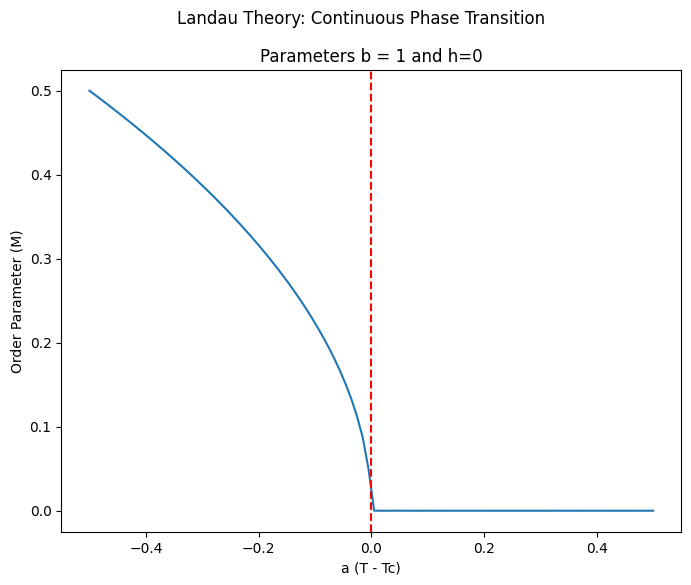

In [13]:
#Landau theory simulation. Continuous phase transition
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define Landau free energy function.
# Note that a here is A(T-Tc)
def landau_free_energy(M, a, b, h):
    return a * M**2 + b * M**4 - h* M

# Minimize the Landau free energy to find equilibrium order parameter
a_values = np.linspace(-0.5, 0.5, 100)  # Varying 'a' around the critical point
b = 1  # Positive for continuous transition
h = 0 # external field
M_eq = []

for a in a_values:
    result = minimize(landau_free_energy, x0=0.1, args=(a, b, h))
    M_eq.append(result.x[0])

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(a_values, M_eq, label="Equilibrium Order Parameter")
plt.axvline(0, color='r', linestyle='--', label="Critical Point")
plt.xlabel("a (T - Tc)")
plt.ylabel("Order Parameter (M)")
plt.suptitle("Landau Theory: Continuous Phase Transition")
plt.title(f"Parameters b = {b} and h={h}", fontsize=12)
plt.show()

1. What is the effect of a finite external field h in the transition?

2. How would you generalize the code to account for discontinuous phase transitions?

3. And for a continuous symmetry?

**Monte Carlo calculations**

We can also calculate magnetization as a function of temperature with numerical methods. Here you have a simple code that uses the Monte Carlo Method to calculate the magnetization for an Ising Model in 2 dimensions.

The Hamiltonian is

$H=- J \sum_{⟨ i,j ⟩} \sigma_i^z \sigma_j^z $

with $\sigma_i^z$ being $⇑$ (+1) or $⇓$ (-1).

In equilibrium, the possible spin configurations have an ocurrence probability proportional to the Boltzmann factor. If you have two configurations, A and B, and P(A) and P(B) are the probabilities of their occurrence:

$P(A)/P(B)= e^{-E_A/k_B T}/ e^{-E_B/k_B T}= e^{-(E_A-E_B)/k_B T}$.

The Metropolis algorithm uses this quantity to explore the possible configurations as a function of temperature.

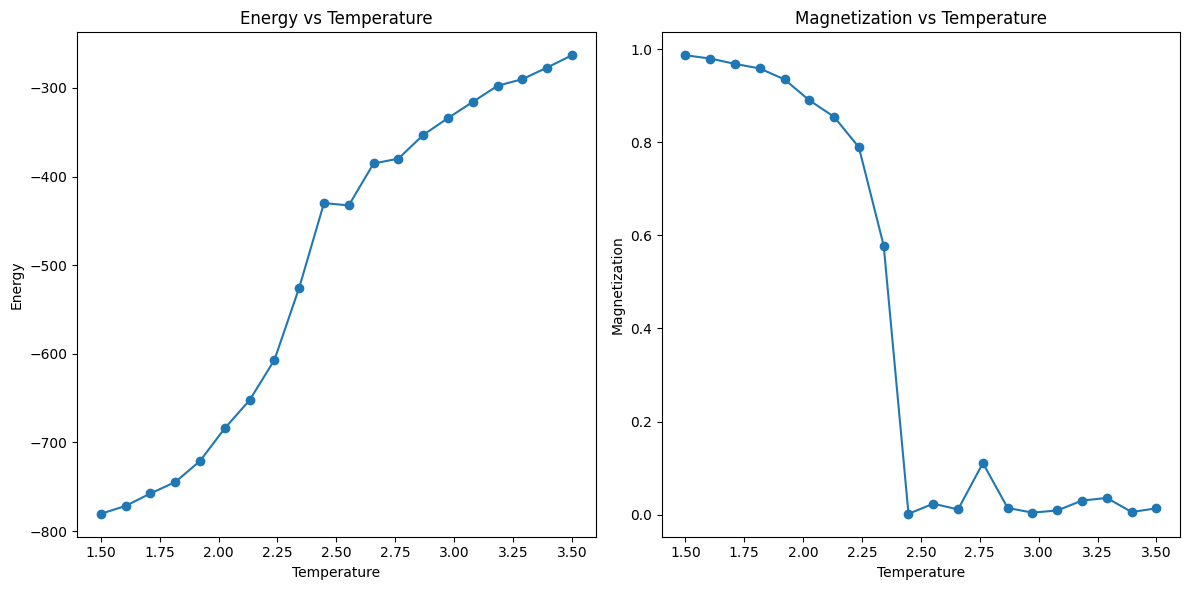

In [16]:
# Ising Model Simulation (2D) – Monte Carlo Method
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Ising Model Parameters
L = 20  # Lattice size (LxL grid)  Small sizes lead to finite size effects.
T = np.linspace(1.5, 3.5, 20)  # Temperature range, and number of points
J = 1  # Interaction strength. J>0 would lead to ferromagnetism while J<0 to antiferromagnetism.
thermal_steps = 2000 #number of updates per temperature

# Initialize the lattice with random spins (+1 or -1)
def initialize_lattice(L):
    return np.random.choice([-1, 1], size=(L, L))

# Calculate total energy of the system
def calculate_energy(lattice):
    energy = 0
    for i in range(L):
        for j in range(L):
            S = lattice[i, j]
            neighbors = lattice[(i+1)%L, j] + lattice[i, (j+1)%L] + lattice[(i-1)%L, j] + lattice[i, (j-1)%L]
            energy += -J * S * neighbors
    return energy / 2  # To account for double counting

# Calculate magnetization
def calculate_magnetization(lattice):
    return np.sum(lattice)/(L*L) #normalize to system size

# Metropolis algorithm
# 1. Chooses a site randomly.
# 2. Calculates the energy dE associated to flipping the spin at that site.
# 3. If a random number is smaller than P(A)/P(B), the spin flip is accepted. Otherwise, the spin stays the same.
def metropolis_step(lattice, beta):
    for _ in range(L**2):  # Perform L^2 Monte Carlo steps.
        i = np.random.randint(0, L)
        j = np.random.randint(0, L)
        S = lattice[i, j]
        neighbors = lattice[(i+1)%L, j] + lattice[i, (j+1)%L] + lattice[(i-1)%L, j] + lattice[i, (j-1)%L]
        dE = 2 * J * S * neighbors
        if dE < 0 or np.random.rand() < np.exp(-dE * beta):
            lattice[i, j] *= -1

# Simulation
energy_list = []
magnetization_list = []

# Initizalize
lattice = initialize_lattice(L)

for temp in T:
    beta = 1 / temp
    measurements_energy = []  # Store energy measurements
    measurements_magnetization = []  # Store magnetization measurements

    # Thermalization: First 500 steps
    for _ in range(500):
        metropolis_step(lattice, beta)

    # Collect measurements every 10 steps
    for _ in range(500):  # Next 500 steps
        metropolis_step(lattice, beta)
        if _ % 10 == 0:  # Collect measurement every 10 steps
            energy = calculate_energy(lattice)
            magnetization = calculate_magnetization(lattice)
            measurements_energy.append(energy)
            measurements_magnetization.append(magnetization)

    # Average measurements
    avg_energy = np.mean(measurements_energy)
    avg_magnetization = np.mean(measurements_magnetization)

    # Append averages to the lists
    energy_list.append(avg_energy)
    magnetization_list.append(avg_magnetization)

# After animation, show energy and magnetization plots
plt.figure(figsize=(12, 6))

# Energy plot
plt.subplot(1, 2, 1)
plt.plot(T, energy_list, 'o-', label="Energy")
plt.xlabel("Temperature")
plt.ylabel("Energy")
plt.title("Energy vs Temperature")

# Magnetization plot
plt.subplot(1, 2, 2)
plt.plot(T, np.abs(magnetization_list), 'o-', label="Magnetization")
plt.xlabel("Temperature")
plt.ylabel("Magnetization")
plt.title("Magnetization vs Temperature")

plt.tight_layout()
plt.show()

The following code gives you snapshots of possible spin configurations for the 2D Ising model above. **Download and run locally.** The images are saved in a gif file.

Animation saved as 'animation_slowed.gif'.


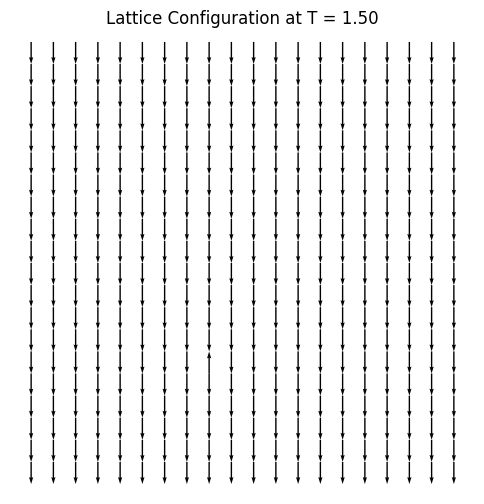

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Ising Model Parameters
L = 20  # Lattice size (LxL grid)
T = np.linspace(1.5, 3.5, 20)  # Temperature range
J = 1  # Interaction strength

# Initialize the lattice with random spins (+1 or -1)
def initialize_lattice(L):
    return np.random.choice([-1, 1], size=(L, L))

# Metropolis algorithm
def metropolis_step(lattice, beta):
    for _ in range(L**2):  # Perform L^2 Monte Carlo steps
        i = np.random.randint(0, L)
        j = np.random.randint(0, L)
        S = lattice[i, j]
        neighbors = lattice[(i+1)%L, j] + lattice[i, (j+1)%L] + lattice[(i-1)%L, j] + lattice[i, (j-1)%L]
        dE = 2 * J * S * neighbors
        if dE < 0 or np.random.rand() < np.exp(-dE * beta):
            lattice[i, j] *= -1

# Prepare for animation
lattice = initialize_lattice(L)

# Create figure for animation
fig, ax = plt.subplots(figsize=(6, 6))
x, y = np.meshgrid(np.arange(L), np.arange(L))
#quiver draws arrows
quiver = ax.quiver(x, y, np.zeros_like(lattice), np.zeros_like(lattice), scale=1, scale_units='xy', pivot='middle')
ax.set_title("Lattice Configuration")
ax.axis("off")

# Update function for the animation
def update(frame):
    global lattice
    temp = T[frame]
    beta = 1 / temp
    for _ in range(1000):  # Update lattice
        metropolis_step(lattice, beta)
    # Update quiver plot
    U = np.zeros_like(lattice)
    V = lattice  # Spins (+1 or -1) determine arrow orientation
    quiver.set_UVC(U, V)
    ax.set_title(f"Lattice Configuration at T = {temp:.2f}")

# Create animation
ani = FuncAnimation(
    fig, update, frames=len(T), repeat=False, interval=500  # 500ms per frame
)

# Save animation
ani.save("animation_slowed.gif", writer=PillowWriter(fps=1))

print("Animation saved as 'animation_slowed.gif'.")

How would you modify the code for the XY model? In this case the spin orientations are given by an angle $\theta$ such that $S(\mathbf r)= S (\cos\theta,\sin\theta)$